In [22]:
## Unsupervized learning Clustring, here by the machine find  similar pattend and groups data based 
## on patterns

In [23]:
##Logistic Reg the dependet variavle is catrgorical and lenier reg the depndet variavle y is contineous like 
## price of house

In [24]:
import numpy as np
import pandas as pd
data = pd.read_csv('./ClassificationData/penguins.csv')
print(data.shape)
data.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [25]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [26]:
data.groupby('species').sum().count()

C:\Users\juud0\AppData\Local\Temp\ipykernel_3836\1736238620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('species').sum().count()


bill_length_mm       3
bill_depth_mm        3
flipper_length_mm    3
body_mass_g          3
dtype: int64

In [27]:
data.groupby(['species','sex'])['sex'].count()

species    sex   
Adelie     Female    73
           Male      73
Chinstrap  Female    34
           Male      34
Gentoo     Female    58
           Male      61
Name: sex, dtype: int64

In [28]:
from pycaret.classification import *
s = setup(data, target = 'species', train_size=0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
4,Original data shape,"(333, 7)"
5,Transformed data shape,"(333, 9)"
6,Transformed train set shape,"(266, 9)"
7,Transformed test set shape,"(67, 9)"
8,Ordinal features,1
9,Numeric features,4


In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9962,0.0000,0.9962,0.9965,0.9961,0.9940,0.9942,0.0630
lda,Linear Discriminant Analysis,0.9962,1.0000,0.9962,0.9965,0.9961,0.9940,0.9942,0.0830
rf,Random Forest Classifier,0.9923,0.9998,0.9923,0.9933,0.9923,0.9880,0.9884,0.2570
et,Extra Trees Classifier,0.9923,0.9996,0.9923,0.9932,0.9923,0.9881,0.9886,0.2520
lr,Logistic Regression,0.9886,0.9996,0.9886,0.9892,0.9887,0.9823,0.9826,0.9270
lightgbm,Light Gradient Boosting Machine,0.9885,1.0000,0.9885,0.9897,0.9884,0.9820,0.9827,0.1420
dt,Decision Tree Classifier,0.9848,0.9880,0.9848,0.9864,0.9847,0.9761,0.9770,0.0830
gbc,Gradient Boosting Classifier,0.9848,0.9994,0.9848,0.9864,0.9847,0.9761,0.9770,0.3610
ada,Ada Boost Classifier,0.9437,0.9898,0.9437,0.9561,0.9426,0.9126,0.9189,0.1590
nb,Naive Bayes,0.8340,0.9978,0.8340,0.9098,0.8364,0.7554,0.7888,0.0840


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)

In [31]:
lightgbm = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9615,1.0000,0.9615,0.9647,0.9606,0.9400,0.9422
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9615,1.0000,0.9615,0.9647,0.9606,0.9400,0.9422


In [32]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9615,0.0000,0.9615,0.9647,0.9606,0.9400,0.9422


In [33]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

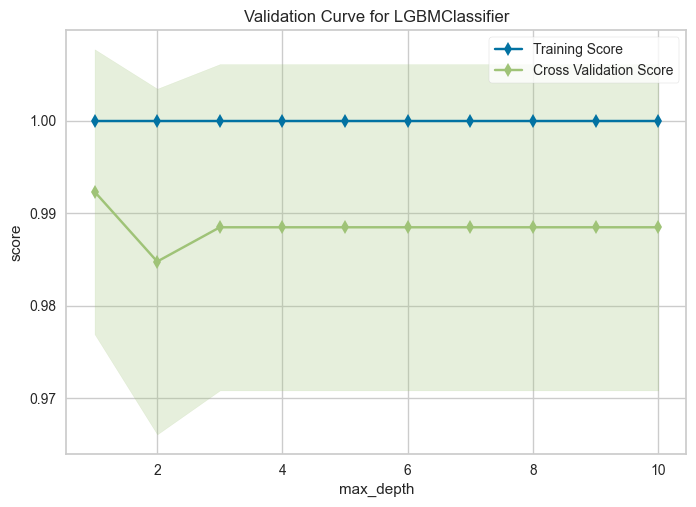

In [35]:
plot_model(lightgbm, plot = 'vc')

In [36]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9851,1.0000,0,0,0,0.9768,0.9772


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,prediction_label,prediction_score
266,Biscoe,50.500000,15.2,216,5000,Female,Gentoo,Gentoo,1.0000
267,Dream,45.700001,17.0,195,3650,Female,Chinstrap,Chinstrap,1.0000
268,Dream,39.599998,18.1,186,4450,Male,Adelie,Adelie,1.0000
269,Biscoe,47.500000,14.0,212,4875,Female,Gentoo,Gentoo,1.0000
270,Biscoe,47.700001,15.0,216,4750,Female,Gentoo,Gentoo,1.0000
...,...,...,...,...,...,...,...,...,...
328,Biscoe,50.500000,15.9,222,5550,Male,Gentoo,Gentoo,1.0000
329,Torgersen,40.200001,17.0,176,3450,Female,Adelie,Adelie,1.0000
330,Biscoe,45.000000,15.4,220,5050,Male,Gentoo,Gentoo,1.0000
331,Dream,33.099998,16.1,178,2900,Female,Adelie,Adelie,0.9994


In [37]:
tuned_lightgbm = tune_model(lightgbm, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9444,0.9944,0.9444,0.9524,0.9447,0.9143,0.9187
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [38]:
df_lightgbm = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9851,1.0000,0,0,0,0.9768,0.9772


In [40]:
df_lightgbm

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,prediction_label,prediction_score
266,Biscoe,50.500000,15.2,216,5000,Female,Gentoo,Gentoo,1.0000
267,Dream,45.700001,17.0,195,3650,Female,Chinstrap,Chinstrap,1.0000
268,Dream,39.599998,18.1,186,4450,Male,Adelie,Adelie,1.0000
269,Biscoe,47.500000,14.0,212,4875,Female,Gentoo,Gentoo,1.0000
270,Biscoe,47.700001,15.0,216,4750,Female,Gentoo,Gentoo,1.0000
...,...,...,...,...,...,...,...,...,...
328,Biscoe,50.500000,15.9,222,5550,Male,Gentoo,Gentoo,1.0000
329,Torgersen,40.200001,17.0,176,3450,Female,Adelie,Adelie,1.0000
330,Biscoe,45.000000,15.4,220,5050,Male,Gentoo,Gentoo,1.0000
331,Dream,33.099998,16.1,178,2900,Female,Adelie,Adelie,0.9994


In [39]:
df_lightgbm[df_lightgbm['species'] != df_lightgbm['prediction_label']]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,prediction_label,prediction_score
299,Dream,42.200001,18.5,180,3550,Female,Adelie,Chinstrap,0.9032
